The orginal "500 Cities: Coronary heart disease among adults aged >=18 years" dataset from the cdc includes estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities. These estimates can be used to identify emerging health problems and to inform development and implementation of effective, targeted public health prevention activities. 

https://data.cdc.gov/500-Cities-Places/500-Cities-Coronary-heart-disease-among-adults-age/cqcq-r6f8

In [62]:
# Dependencies
import pandas as pd
from pathlib import Path

In [63]:
# Name of the CSV file
file = Path('Resources/500_Cities_Coronary_heart_disease_among_adults.csv')

In [64]:
# Read the CSV in pandas
heart_disease_df = pd.read_csv(file)

In [65]:
heart_disease_df.columns


Index(['Year ', 'StateAbbr ', 'StateDesc     ', 'CityName                   ',
       'GeographicLevel ', 'DataSource ', 'Category        ',
       'UniqueID            ',
       'Measure                                             ',
       'Data_Value_Unit ', 'DataValueTypeID ', 'Data_Value_Type         ',
       'Data_Value ', 'Low_Confidence_Limit ', 'High_Confidence_Limit ',
       'Data_Value_Footnote_Symbol ',
       'Data_Value_Footnote                              ', 'PopulationCount ',
       'GeoLocation                       ', 'CategoryID ', 'MeasureId ',
       'CityFIPS ', 'TractFIPS   ', 'Short_Question_Text'],
      dtype='object')

In [66]:
# Remove unnecessary columns - create a new data frame with only the columns we need

heart_disease_df = heart_disease_df[['StateDesc     ', 'CityName                   ', 'Data_Value ', 'PopulationCount ',
       'GeoLocation                       ']]

heart_disease_df.head()


,StateDesc,CityName,Data_Value,PopulationCount,GeoLocation
0,California,Hayward,4.8,"144,186","(37.6329591551, -122.077051051)"
1,Alabama,Huntsville,6.7,"180,105","(34.6989692671, -86.6387042882)"
2,Arizona,Chandler,3.8,"236,123","(33.28318981, -111.852210033)"
3,Arizona,Surprise,5.9,"117,517","(33.6803835177, -112.452218439)"
4,California,Bellflower,5.3,"76,616","(33.8880417923, -118.127100236)"


In [67]:
# Rename the columns for better understanding and reorder the columns 
# Data Value - clarify percentage unit

heart_disease_data_df = heart_disease_df.rename(columns={'StateDesc     ': "State",
                                                         'CityName                   ': "City",
                                                         'Data_Value ': "Percent of Population (%)", 'PopulationCount ': "Population",
                                                         'GeoLocation                       ': "Geo Location"})

heart_disease_data_df.head()

,State,City,Percent of Population (%),Population,Geo Location
0,California,Hayward,4.8,"144,186","(37.6329591551, -122.077051051)"
1,Alabama,Huntsville,6.7,"180,105","(34.6989692671, -86.6387042882)"
2,Arizona,Chandler,3.8,"236,123","(33.28318981, -111.852210033)"
3,Arizona,Surprise,5.9,"117,517","(33.6803835177, -112.452218439)"
4,California,Bellflower,5.3,"76,616","(33.8880417923, -118.127100236)"


In [68]:
# Remove leading and trailing spaces from the values in columns

heart_disease_data_df[['State', 'Percent of Population (%)', 'Population', 'Geo Location']] = heart_disease_data_df[['State', 'Percent of Population (%)', 'Population', 'Geo Location']].apply(lambda x: x.str.strip())

In [69]:
# Groupby state
heart_disease_data_df = heart_disease_data_df.fillna(0)
heart_disease_data_df

#Set State as the index
organized_df = heart_disease_data_df.set_index("State")
organized_df

# Sort the index so the states are grouped in alphabetical order
organized_heart_disease_df = organized_df.sort_index()
organized_heart_disease_df



# Identify "United States" rows and remove from df because they're not needed
partial_match_row = organized_heart_disease_df[organized_heart_disease_df.index.str.contains('United', case=False)]
partial_match_row

organized_heart_disease_df = organized_heart_disease_df.drop(partial_match_row.index, axis=0)
organized_heart_disease_df



,City,Percent of Population (%),Population,Geo Location
State,,,,
Alabama,Mobile,5.7,"1,708","(30.6919609185, -88.0738103038)"
Alabama,Tuscaloosa,3.3,"1,724","(33.1650878227, -87.5617780419)"
Alabama,Birmingham,4.8,815,"(33.6718848706, -86.6772510465)"
Alabama,Montgomery,10.1,"1,605","(32.3720175299, -86.3087966777)"
Alabama,Hoover,5.9,"4,223","(33.4019456118, -86.8333493253)"
...,...,...,...,...
Wyoming,Cheyenne,5.8,"4,580","(41.1243595766, -104.813946446)"
Wyoming,Cheyenne,5.7,"4,331","(41.1347650805, -104.819326156)"
Wyoming,Cheyenne,5.9,"3,026","(41.1414159833, -104.829095061)"


In [70]:
# Clean the data within each column - remove spaces and separate geolocation string


# Remove nondigit values like commas and parenthesis from each column

organized_heart_disease_df['Population'] = organized_heart_disease_df['Population'].str.replace(r'[,]', '', regex=True)


organized_heart_disease_df['Geo Location'] = organized_heart_disease_df['Geo Location'].str.replace(r'[()]', '', regex=True)

# Separate geolocation string into Latitude and Longitude columns 
organized_heart_disease_df[['Latitude', 'Longitude']] = organized_heart_disease_df['Geo Location'].str.split(', ', expand=True)

# Remove the original Geo Location column

del organized_heart_disease_df['Geo Location']

organized_heart_disease_df


,City,Percent of Population (%),Population,Latitude,Longitude
State,,,,,
Alabama,Mobile,5.7,1708,30.6919609185,-88.0738103038
Alabama,Tuscaloosa,3.3,1724,33.1650878227,-87.5617780419
Alabama,Birmingham,4.8,815,33.6718848706,-86.6772510465
Alabama,Montgomery,10.1,1605,32.3720175299,-86.3087966777
Alabama,Hoover,5.9,4223,33.4019456118,-86.8333493253
...,...,...,...,...,...
Wyoming,Cheyenne,5.8,4580,41.1243595766,-104.813946446
Wyoming,Cheyenne,5.7,4331,41.1347650805,-104.819326156
Wyoming,Cheyenne,5.9,3026,41.1414159833,-104.829095061


In [71]:
# Convert all columns to integers 
columns_to_convert = ["Percent of Population (%)", "Population", "Latitude", "Longitude"]
organized_heart_disease_df[["Percent of Population (%)", "Population", "Latitude", "Longitude"]] = organized_heart_disease_df[["Percent of Population (%)", "Population", "Latitude", "Longitude"]].apply(pd.to_numeric)



In [72]:
# Convert new organized_heart_disease_df to a csv file for future use

organized_heart_disease_df.to_csv("Resources/coronary_heart_disease_by_state.csv")

---------------------------------

In [73]:
# Data from coffee consumption (from Site)
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
coffee_state_consumption_df = pd.DataFrame(data)

# Display the DataFrame
print(coffee_state_consumption_df)


             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [74]:
# Convert states from coffee df to a list
states_from_coffee = coffee_state_consumption_df["State"].tolist()

# Filter data with states in list
filtered_heart_disease_df = organized_heart_disease_df.index.isin(states_from_coffee)

heart_disease_coffee_bystate_df = organized_heart_disease_df[filtered_heart_disease_df]

# Replace na with 0
heart_disease_coffee_bystate_df = heart_disease_coffee_bystate_df.fillna(0)
heart_disease_coffee_bystate_df



,City,Percent of Population (%),Population,Latitude,Longitude
State,,,,,
Arizona,Phoenix,7.7,2323,33.412654,-112.048651
Arizona,Phoenix,4.1,2994,33.617501,-111.934868
Arizona,Peoria,2.3,3501,33.775532,-112.244542
Arizona,Glendale,0.0,8,33.696346,-112.205387
Arizona,Peoria,5.4,154065,33.784721,-112.298681
...,...,...,...,...,...
Wisconsin,Milwaukee,5.8,2923,43.067903,-87.960971
Wisconsin,Milwaukee,3.0,2477,43.077915,-87.888079
Wisconsin,Milwaukee,5.0,4311,42.980394,-87.892837


In [75]:
######Create new df with average pop% and summed pop with merged coffee data, remove lat and lon to create statistical analysis, but use heart_disease_coffee_bystate_df for mapping

# Get the average of Percent of Population with coronary heart disease per state

mean_percent_by_state_df = heart_disease_coffee_bystate_df.groupby('State')['Percent of Population (%)'].mean()
mean_percent_by_state_df

# Get the total sum of the population of each state

total_pop_by_state_df = heart_disease_coffee_bystate_df.groupby('State')['Population'].sum()
total_pop_by_state_df



# Create a new df with just the mean and sum of pop % and pop with coffee_state_consumption_df

merged_hd_data = pd.merge(mean_percent_by_state_df, total_pop_by_state_df, on='State', how='outer')

coffee_consumption_hd_df = pd.merge(merged_hd_data, coffee_state_consumption_df, on='State', how='outer')

coffee_consumption_hd_df = coffee_consumption_hd_df.fillna(0)

# Confirm all values in data frame to numeric for statistical analysis
columns_to_convert = ["Percent of Population (%)", "Population", "Cups of Coffee"]
coffee_consumption_hd_df[columns_to_convert] = coffee_consumption_hd_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
coffee_consumption_hd_df



,State,Percent of Population (%),Population,Cups of Coffee
0,Arizona,4.990593,11688222.0,1.30
1,Arkansas,5.963636,1471119.0,2.12
2,Delaware,6.307692,212553.0,2.44
3,Georgia,5.798312,4655310.0,1.54
4,Hawaii,4.248963,2859621.0,1.52
5,Kansas,5.675862,3127542.0,2.07
6,Louisiana,6.705913,3095853.0,2.03
7,Maine,4.995455,198582.0,2.05
8,Maryland,5.915347,1862883.0,1.57
9,Massachusetts,5.146979,5582988.0,1.51


Statistical Analysis and Visualization

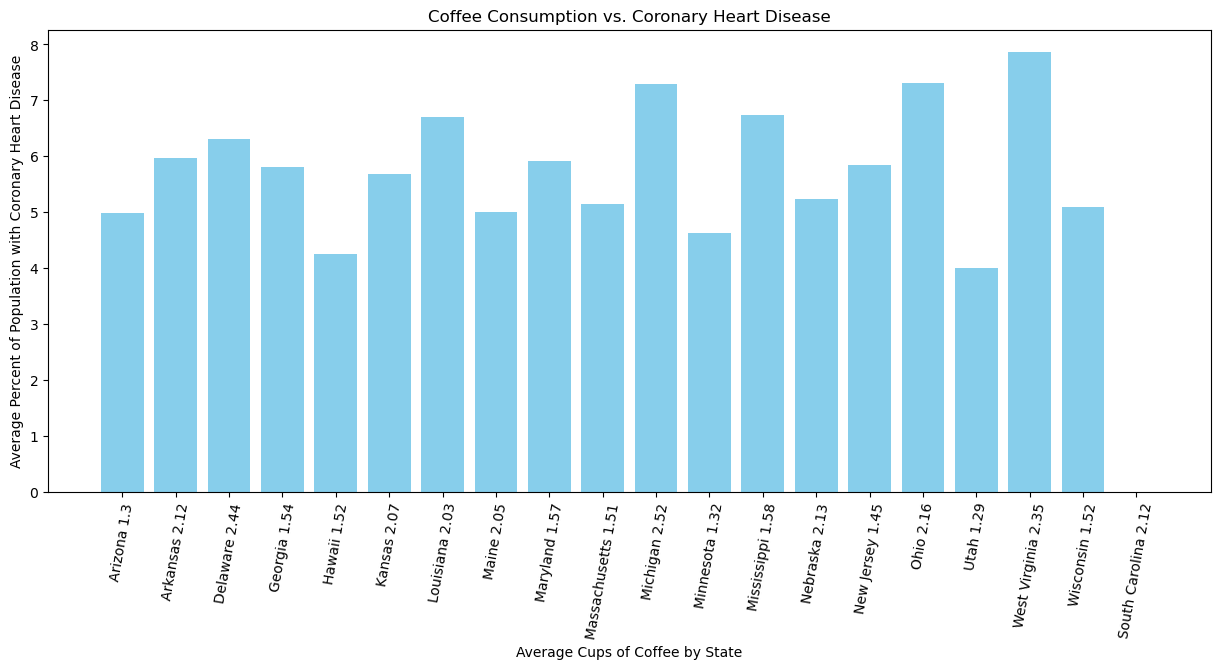

In [76]:
# Create a bar graph to show the overall average data
import matplotlib.pyplot as plt
from scipy import stats


categories = coffee_consumption_hd_df['State'] + " " + coffee_consumption_hd_df['Cups of Coffee'].astype(str)

values = coffee_consumption_hd_df["Percent of Population (%)"]

plt.figure(figsize=(15,6))

plt.bar(categories, values, color='skyblue')


plt.xlabel("Average Cups of Coffee by State")
plt.ylabel("Average Percent of Population with Coronary Heart Disease")
plt.title("Coffee Consumption vs. Coronary Heart Disease")
plt.xticks(rotation=80)

plt.show()

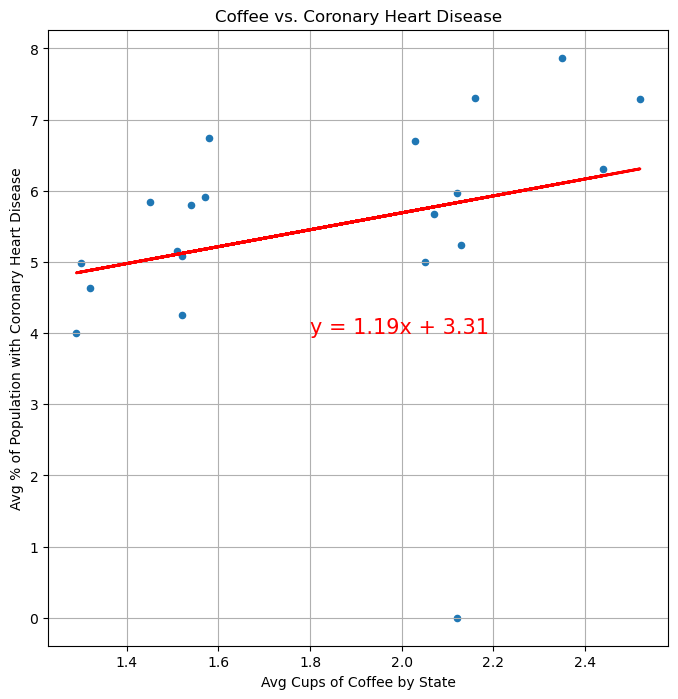

In [77]:
# Show scatter plot and linear regression to show a more detailed look at the relationship using the averages 
from scipy.stats import linregress

x_values = coffee_consumption_hd_df["Cups of Coffee"]
y_values = coffee_consumption_hd_df["Percent of Population (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

heart_coffee_plt = coffee_consumption_hd_df.plot(kind="scatter", x="Cups of Coffee", y="Percent of Population (%)", grid=True, figsize=(8,8),
              title="Coffee vs. Coronary Heart Disease")

heart_coffee_plt.plot(x_values, regress_values, color='red', linewidth=2)
plt.annotate(line_eq,(1.8,4),fontsize=15,color="red")
plt.ylabel("Avg % of Population with Coronary Heart Disease")
plt.xlabel("Avg Cups of Coffee by State")
plt.show()



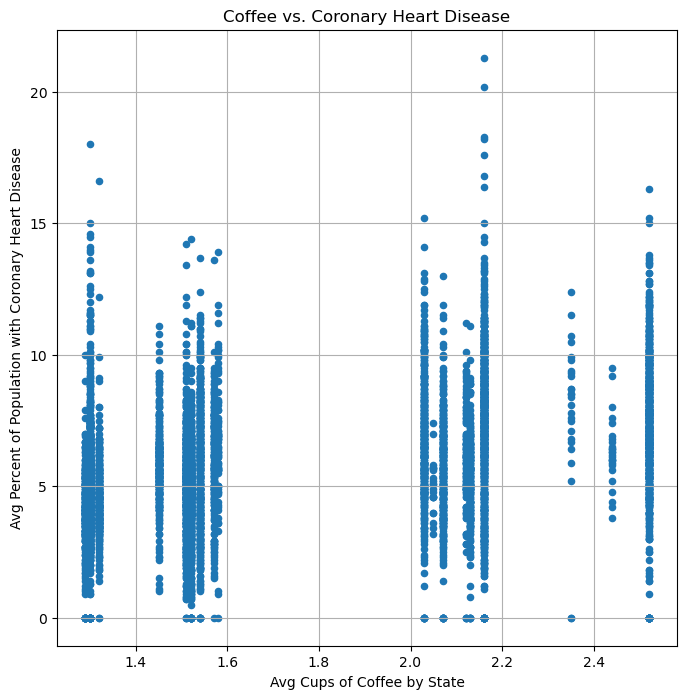

In [78]:
# Show scatter plot and linear regression to show a more detailed look at the relationship using all cities
# Merge heart_disease_coffee_bystate_df with coffee_state_consumption_df

correlation_btwn_coffee_heart_disease_df = pd.merge(heart_disease_coffee_bystate_df, coffee_state_consumption_df, on='State', how='outer')

# Use new dataframe to create a more detailed scatter plot

correlation_btwn_coffee_heart_disease_df.plot(kind="scatter", x="Cups of Coffee", y="Percent of Population (%)", grid=True, figsize=(8,8),
              title="Coffee vs. Coronary Heart Disease")
plt.xlabel("Avg Cups of Coffee by State")
plt.ylabel("Avg Percent of Population with Coronary Heart Disease")
plt.show()


In [85]:
# Calculate the Pearson correlation coefficient and the p-value in order to identify:
# the the strength (closer to -1 or 1 indicates stronger correlation) and the direction (positive or negative correlation) of the relationship.
# import pearson r
from scipy.stats import pearsonr

corr_coefficient, p_value = pearsonr(coffee_consumption_hd_df["Percent of Population (%)"], coffee_consumption_hd_df["Cups of Coffee"])


#correlation_coef, p_value = avg_coffee.corr(avg_percent)


print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.290894354008399
P-value: 0.2133974571789424


Map of correlation between coronary heart disease and average cups of coffee by state

In [ ]:
# use heart_disease_coffee_bystate_df for mapping to get a closer look at how heart disease is or is not correlated to average cup of coffee by state

#create an arcgis map to show coffee and heart disease